In [ ]:
# Student Study Hours 
# https://www.kaggle.com/datasets/himanshunakrani/student-study-hours?resource=download


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("/content/score.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.shape

(25, 2)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

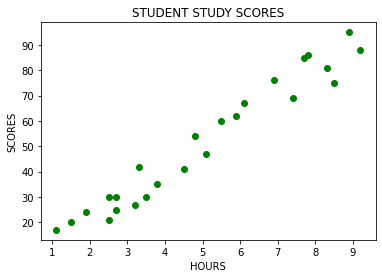

In [ ]:
plt.scatter(x=df["Hours"], y=df["Scores"], color="green")
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.title("STUDENT STUDY SCORES");

FIT THE DATA TO APPROPRIATE MODEL

In [ ]:
X = x=df["Hours"]
y=df["Scores"]

In [ ]:
print(X)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


In [ ]:
print(y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
print(X_train)

12    4.5
23    6.9
7     5.5
2     3.2
16    2.5
8     8.3
18    6.1
5     1.5
19    7.4
20    2.7
4     3.5
9     2.7
22    3.8
17    1.9
0     2.5
10    7.7
24    7.8
15    8.9
1     5.1
6     9.2
Name: Hours, dtype: float64


In [ ]:
print(y_train)

12    41
23    76
7     60
2     27
16    30
8     81
18    67
5     20
19    69
20    30
4     30
9     25
22    35
17    24
0     21
10    85
24    86
15    95
1     47
6     88
Name: Scores, dtype: int64


In [ ]:
X_test.shape

(5,)

In [ ]:
type(X_test)

pandas.core.series.Series

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(f"shape: {X_test.shape}, type: {type(X_test)}")


shape: (5,), type: <class 'numpy.ndarray'>


In [ ]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [ ]:
X_train

array([[4.5],
       [6.9],
       [5.5],
       [3.2],
       [2.5],
       [8.3],
       [6.1],
       [1.5],
       [7.4],
       [2.7],
       [3.5],
       [2.7],
       [3.8],
       [1.9],
       [2.5],
       [7.7],
       [7.8],
       [8.9],
       [5.1],
       [9.2]])

In [ ]:
print(f"shape: {X_test.shape}, type: {type(X_test)}")

shape: (5, 1), type: <class 'numpy.ndarray'>


In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train,y_train)

LinearRegression()

OPTIMIZING THE MODEL

In [ ]:
lr_pred = lr_model.predict(X_test)
lr_pred

array([[87.02714785],
       [33.46311598],
       [60.24513192],
       [10.80141019],
       [48.91427902]])

In [ ]:
X_test

array([[8.5],
       [3.3],
       [5.9],
       [1.1],
       [4.8]])

In [ ]:
for i in range(len(X_test)):
  print(f"Actual Value: {y_test[i]}, Predicted Value: {lr_pred[i]}")

Actual Value: [75], Predicted Value: [87.02714785]
Actual Value: [42], Predicted Value: [33.46311598]
Actual Value: [62], Predicted Value: [60.24513192]
Actual Value: [17], Predicted Value: [10.80141019]
Actual Value: [54], Predicted Value: [48.91427902]


range(0, 5)

In [ ]:
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)
print(f"MAE: {mae}\nMSE: {mse}\nR2_SCORE: {r2} ")

MAE: 6.720642147174473
MSE: 56.97946192455608
R2_SCORE: 0.852994164281331 


In [ ]:
lr_model.predict([[5]])

array([[50.97443409]])

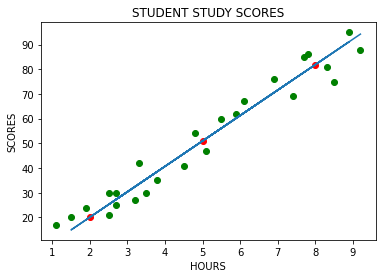

In [ ]:
X_predictions = lr_model.predict(X_train)

plt.scatter(x=df["Hours"], y=df["Scores"], color="green")
plt.plot(X_train, X_predictions)
plt.scatter(x=2, y=lr_model.predict([[2]]), color="red")
plt.scatter(x=5, y=lr_model.predict([[5]]), color="red")
plt.scatter(x=8, y=lr_model.predict([[8]]), color="red")

plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.title("STUDENT STUDY SCORES");